## Dataset generator

### Sample 1: Braincorp AG is a fast growing biotech in Zug. This data set contains employee data for all 3'450 permanent employees as of today.

output: employee_data1.pkl



In [3]:
%pip install Faker

  Using cached Faker-19.6.2-py3-none-any.whl (1.7 MB)

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import random
from faker import Faker
import datetime

# Set a seed for reproducibility
random.seed(42)

# Create a Faker instance to generate names
fake = Faker()

# Initialize lists to store data
first_names = []
last_names = []
genders = []
ranks = []
birthdates = []
birthyears = []

# Define the distribution of ranks
rank_distribution = {
    "Employee": 30,
    "Associate Director": 20,
    "Director": 15,
    "Senior Director": 10,
    "CEO": 5
}

# Generate data for employees
for _ in range(4450):
    # Generate gender (30% women)
    gender = random.choice(["Male", "Female"])
    
    # Generate first and last names of European and Asian origins
    if gender == "Male":
        first_name = fake.first_name_male()
    else:
        first_name = fake.first_name_female()
    
    last_name = fake.last_name()
    
    # Generate birthdate for different generations
    current_year = datetime.datetime.now().year
   
    birth_date = fake.date_of_birth(minimum_age=20, maximum_age=70)
    birth_year = birth_date.year
    
    # Introduce some data errors
    if random.random() < 0.05:
        # Invalid date of birth
        birth_date = fake.date_of_birth(minimum_age=120, maximum_age=350)
        birth_year = birth_date.year
    if random.random() < 0.05:
        # Numbers instead of names
        first_name = random.randint(1000, 9999)
        last_name = random.randint(1000, 9999)
         
    
    # Generate rank based on the defined distribution
    rank = random.choices(list(rank_distribution.keys()), 
                          weights=list(rank_distribution.values()))[0]
    
    # Append data to lists
    first_names.append(first_name)
    last_names.append(last_name)
    genders.append(gender)
    ranks.append(rank)
    birthdates.append(birth_date)
    birthyears.append(birth_year)

# Create a DataFrame
df = pd.DataFrame({
    'First Name': first_names,
    'Last Name': last_names,
    'Gender': genders,
    'Rank': ranks,
    'Birthdate': birthdates,
    'Birthyear': birthyears
})

# Display the first few rows of the DataFrame
print(df.head())


    First Name Last Name  Gender      Rank   Birthdate  Birthyear
0         Kent     Allen    Male  Employee  1776-12-12       1776
1      Richard     Smith    Male  Employee  1965-06-09       1965
2       Taylor   Sanchez  Female  Employee  1705-12-28       1705
3  Christopher    Garcia    Male  Director  1963-08-17       1963
4      Rebecca    Jarvis  Female  Director  1999-07-04       1999


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4450 entries, 0 to 4449
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   First Name  4450 non-null   object
 1   Last Name   4450 non-null   object
 2   Gender      4450 non-null   object
 3   Rank        4450 non-null   object
 4   Birthdate   4450 non-null   object
 5   Birthyear   4450 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 208.7+ KB


In [14]:
# show distribution by year of birth
df['Birthyear'].value_counts().sort_index()

1676     1
1677     2
1680     2
1684     1
1685     2
        ..
1999    65
2000    84
2001    77
2002    82
2003    82
Name: Birthyear, Length: 192, dtype: int64

In [15]:
# show a distribtion of the ranks
df['Rank'].value_counts()

Employee              1644
Associate Director    1091
Director               880
Senior Director        538
CEO                    297
Name: Rank, dtype: int64

In [16]:
gender_first_name_counts = df.groupby(['Gender', 'First Name']).size().reset_index(name='Count')


In [17]:
gender_first_name_counts.sample(10)

,Gender,First Name,Count
752,Male,Terrance,1
436,Male,3319,1
225,Female,Jasmin,1
663,Male,Jorge,4
422,Male,2205,1
471,Male,6763,1
499,Male,8652,1
512,Male,9863,1
546,Male,Bruce,8
20,Female,2766,1


In [18]:
df.to_pickle("../data/employees_data1.pkl")

### Sample 2

Pandix GmbH is an up and coming tech startup operating in the renewable energy sector. This dataset contains the 126 employee data as of last month.


In [28]:
import pandas as pd
import random

# Set a seed for reproducibility
random.seed(42)

# Create lists to store data
employee_ids = []
first_names = []
last_names = []
ages = []
salaries = []
ranks = []
office_locations = []

# Define the Swiss cities
swiss_cities = ["Zürich", "Luzern", "Horgen", "Thalwil", "Meilen"]

# Generate data the employees
for employee_id in range(1, 126):
    first_name = fake.first_name()
    last_name = fake.last_name()
    age = random.randint(22, 65)  # Random age between 22 and 65

    
    rank = random.choice(["Employee", "Associate Director", "Director", "Senior Director", "CEO"])
    office_location = random.choice(swiss_cities)
    
    # Generate salaries with some outliers
    if random.random() < 0.05:
        salary = random.randint(50000, 200000)  # Outlier salary
    else:
        salary = random.randint(4000, 12000)  # Regular salary
    
  # Generate salaries with some outliers
    if random.random() < 0.05:
        employee_id = random.randint(1, 126) # deuplicate employee id

    # Append data to lists
    employee_ids.append(employee_id)
    first_names.append(first_name)
    last_names.append(last_name)
    ages.append(age)
    salaries.append(salary)
    ranks.append(rank)
    office_locations.append(office_location)

# Create a DataFrame
employee_data = pd.DataFrame({
    'Employee_ID': employee_ids,
    'Firstname': first_names,
    'Lastname': last_names,
    'Age': ages,
    'Monthly_Salary': salaries,
    'Rank': ranks,
    'Office_Location': office_locations
})

# Display the first few rows of the DataFrame
print(employee_data.head())


   Employee_ID Firstname Lastname  Age  Monthly_Salary                Rank  \
0            1      Adam  Alvarez   62            6006            Employee   
1           28      Eric  Kennedy   28            4260                 CEO   
2            3    Dakota    Adams   36          102124                 CEO   
3            4    Brooke  Fischer   56            6278     Senior Director   
4            5    Teresa    Payne   22            5273  Associate Director   

  Office_Location  
0          Zürich  
1          Zürich  
2          Meilen  
3          Luzern  
4         Thalwil  


In [22]:
# show salary distribution

employee_data['Monthly_Salary'].describe()

count       125.000000
mean      13184.432000
std       27153.606587
min        4094.000000
25%        6172.000000
50%        8612.000000
75%       10502.000000
max      195385.000000
Name: Salary, dtype: float64

In [29]:
# show distribution by employee id
employee_data.Employee_ID.value_counts()

119    3
28     2
99     2
15     2
44     2
      ..
38     1
37     1
36     1
35     1
125    1
Name: Employee_ID, Length: 118, dtype: int64

In [31]:
employee_data[employee_data.Employee_ID == 119]

,Employee_ID,Firstname,Lastname,Age,Monthly_Salary,Rank,Office_Location
25,119,Michael,Hart,56,8002,CEO,Zürich
74,119,Tina,Ward,58,164309,Associate Director,Horgen
118,119,Thomas,Rodriguez,39,8668,Senior Director,Luzern


In [32]:
employee_data.to_pickle("../data/employees_data2.pkl")

## Sample 3

FINMA is running an investigation into a large fraud scheme at a fund manager where cartel members have infiltrated the staff in order to get access to sensitive information. This dataset is employee list of Casa de papel Asset Management AG.


In [38]:
import pandas as pd
import random
from faker import Faker
import datetime

# Set a seed for reproducibility
random.seed(42)

# Create a Faker instance to generate names and hire dates
fake = Faker()

# Initialize lists to store data
employee_ids = []
first_names = []
last_names = []
ranks = []
hire_years = []
background_check_status = []

# Define the number of employees
num_employees = 1923

# Generate data for employees
for employee_id in range(1, num_employees + 1):
    first_name = fake.first_name()
    last_name = fake.last_name()
    rank = random.choice(["Employee", "Associate Director", "Director", "Senior Director", "CEO"])
    
    # Generate hire date within the last 10 years
    current_year = datetime.datetime.now().year


    hire_year = current_year-random.randint(0, 10)
    # Introduce 57% missing background check status
    if random.random() < 0.57:
        background_check = None
    else:
        background_check = random.choice(["Pass", "Fail"])
    
    # Append data to lists
    employee_ids.append(employee_id)
    first_names.append(first_name)
    last_names.append(last_name)
    ranks.append(rank)
    hire_years.append(hire_year)
    background_check_status.append(background_check)

# Create a DataFrame
employee_data = pd.DataFrame({
    'Employee ID': employee_ids,
    'First Name': first_names,
    'Last Name': last_names,
    'Rank': ranks,
    'Hire year': hire_years,
    'Background Check Status': background_check_status
})

# Display the first few rows of the DataFrame
print(employee_data.head())


   Employee ID First Name  Last Name                Rank  Hire year  \
0            1       Jill  Henderson            Employee       2023   
1            2       Mark     Martin  Associate Director       2021   
2            3     Steven   Mckenzie                 CEO       2017   
3            4    Barbara    Johnson            Employee       2020   
4            5       John    Daniels                 CEO       2023   

  Background Check Status  
0                    Pass  
1                    Pass  
2                    None  
3                    None  
4                    None  


In [39]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Employee ID              1923 non-null   int64 
 1   First Name               1923 non-null   object
 2   Last Name                1923 non-null   object
 3   Rank                     1923 non-null   object
 4   Hire year                1923 non-null   int64 
 5   Background Check Status  787 non-null    object
dtypes: int64(2), object(4)
memory usage: 90.3+ KB


In [40]:
employee_data.to_pickle("../data/employees_data3.pkl")

### Sample 4

Mattex AG is a leading consultancy firm located in Zug. They have gender diversity targets for employee with personel responsibilities (i.e. employees who manage at least another employee).

In [46]:
import pandas as pd
import numpy as np
import datetime

# Set a seed for reproducibility
np.random.seed(42)

# Generate date range from January 1, 2000, to today
start_date = datetime.date(2000, 1, 1)
end_date = datetime.date.today()
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Initialize a list to store percentage of women in management
percentage_women = []

# Define the overall trend parameters
initial_percentage = 0.07  # 7% in 2000
final_percentage = 0.213  # 21.3% today

# Generate the overall trend with a gradual increase
total_days = len(date_range)
slope = (final_percentage - initial_percentage) / total_days
for day in range(total_days):
    percentage = initial_percentage + slope * day
    percentage_women.append(percentage)


# get 3 random dates between start_date and end_date
outlier_dates = np.random.choice(date_range, 3, replace=False)

print(outlier_dates)

outlier_percentages = [0.75, 0.8, 0.07]  # Example outlier percentages

# Update the percentage list with outlier values
for date, outlier_percentage in zip(outlier_dates, outlier_percentages):
    idx = date_range.get_loc(date)
    percentage_women[idx] = outlier_percentage

# Create a DataFrame with the time series data
time_series_data = pd.DataFrame({
    'Date': date_range,
    'Percentage of Women in Management': percentage_women
})

# Print the first few rows of the time series data
print(time_series_data.head())


['2010-11-13T00:00:00.000000000' '2004-07-29T00:00:00.000000000'
 '2008-05-16T00:00:00.000000000']
        Date  Percentage of Women in Management
0 2000-01-01                           0.070000
1 2000-01-02                           0.070016
2 2000-01-03                           0.070033
3 2000-01-04                           0.070049
4 2000-01-05                           0.070066


In [48]:
time_series_data.to_pickle("../data/employees_data4.pkl")

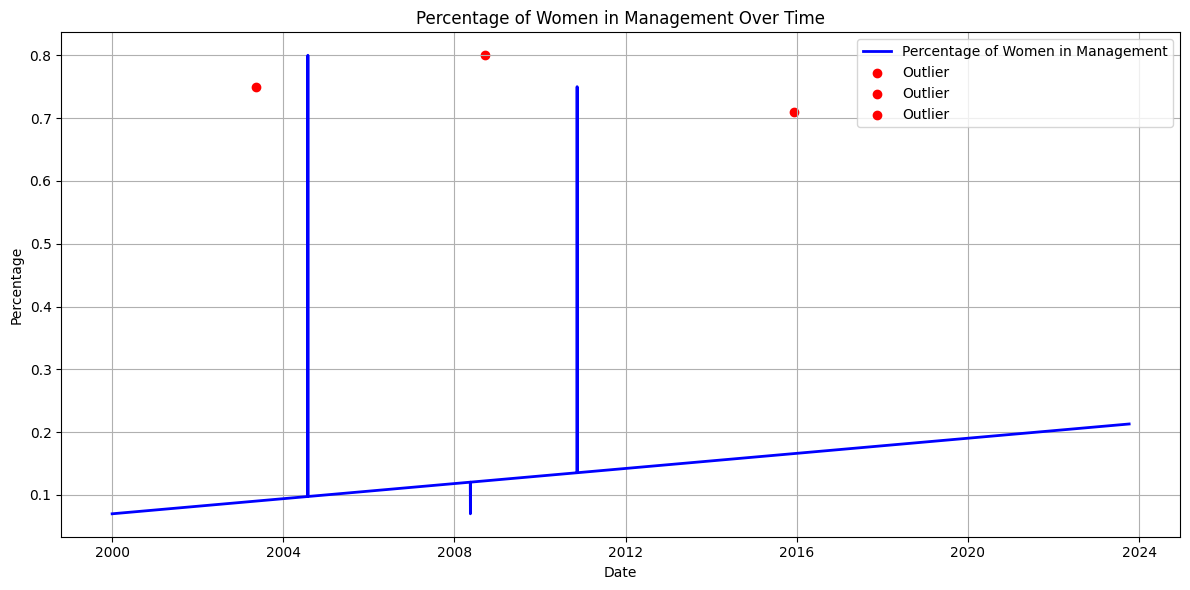

In [47]:
import matplotlib.pyplot as plt

# Extract the date and percentage data from the DataFrame
dates = time_series_data['Date']
percentages = time_series_data['Percentage of Women in Management']

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(dates, percentages, label='Percentage of Women in Management', color='b', linewidth=2)

# Highlight the outlier months
outlier_dates = [
    datetime.date(2003, 5, 15),
    datetime.date(2008, 9, 20),
    datetime.date(2015, 12, 10)
]
outlier_percentages = [0.75, 0.8, 0.71]

for date, percentage in zip(outlier_dates, outlier_percentages):
    plt.scatter(date, percentage, color='r', marker='o', label='Outlier')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.title('Percentage of Women in Management Over Time')
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



